# Employee Data Analysis Project

In [47]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
!pip install squarify
import squarify




# 1. Load Dataset

In [48]:
os.chdir('C:\\Users\\vsmuh\\Downloads')
os.getcwd()

#load data set 
df = pd.read_csv("ABC COMPANY.csv") 

# Quick look
print(df.head())

print(df.info())



            Name            Team  Number Position  Age  Height  Weight  \
0  Avery Bradley  Boston Celtics       0       PG   25  06-Feb     180   
1    Jae Crowder  Boston Celtics      99       SF   25  06-Jun     235   
2   John Holland  Boston Celtics      30       SG   27  06-May     205   
3    R.J. Hunter  Boston Celtics      28       SG   22  06-May     185   
4  Jonas Jerebko  Boston Celtics       8       PF   29  06-Oct     231   

             College     Salary  
0              Texas  7730337.0  
1          Marquette  6796117.0  
2  Boston University        NaN  
3      Georgia State  1148640.0  
4                NaN  5000000.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age     

# 2. Preprocessing

In [49]:

# Replace 'height' column with random values between 150–180
df['Height'] = np.random.randint(150, 181, size=len(df))

# Check consistency
print(df['Height'].describe())

print(df.info())


count    458.000000
mean     165.969432
std        8.748063
min      150.000000
25%      159.000000
50%      166.000000
75%      174.000000
max      180.000000
Name: Height, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    int32  
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int32(1), int64(3), object(4)
memory usage: 30.5+ KB
None


In [37]:
# Calculate median salary
median_salary = df['Salary'].median()

# Fill missing values with median
df['Salary'] = df['Salary'].fillna(median_salary)

# Verify that no missing values remain
print(df['Salary'].isnull().sum())

print(df.info())

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Name       458 non-null    object  
 1   Team       458 non-null    object  
 2   Number     458 non-null    int64   
 3   Position   458 non-null    object  
 4   Age        458 non-null    int64   
 5   Height     458 non-null    int32   
 6   Weight     458 non-null    int64   
 7   College    374 non-null    object  
 8   Salary     458 non-null    float64 
 9   age_group  456 non-null    category
dtypes: category(1), float64(1), int32(1), int64(3), object(4)
memory usage: 31.2+ KB
None


In [52]:
# Find the mode of the College column
mode_value = df['College'].mode()[0]

# Fill missing values with the mode
df['College'] = df['College'].fillna(mode_value)

# Verify that no missing values remain
print(df['College'].isnull().sum())


print(df.info())

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    int32  
 6   Weight    458 non-null    int64  
 7   College   458 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int32(1), int64(3), object(4)
memory usage: 30.5+ KB
None


# 3. Analysis Tasks

In [53]:

# Task 1: Distribution of employees across teams
team_counts = df['Team'].value_counts()
team_percentage = (team_counts / len(df)) * 100
print("Team Distribution:\n", team_counts)
print("Team Percentage:\n", team_percentage)

# Task 2: Segregate employees by position
position_counts = df['Position'].value_counts()
print("Position Distribution:\n", position_counts)

# Task 3: Predominant age group
bins = [20, 30, 40, 50, 60]
labels = ['20-30', '31-40', '41-50', '51-60']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
age_group_counts = df['age_group'].value_counts()
print("Age Group Distribution:\n", age_group_counts)

# Task 4: Highest salary expenditure (team & position)
team_salary = df.groupby('Team')['Salary'].sum()
position_salary = df.groupby('Position')['Salary'].sum()
print("Team Salary Expenditure:\n", team_salary)
print("Position Salary Expenditure:\n", position_salary)

highest_team = team_salary.idxmax()
highest_position = position_salary.idxmax()
print(f"Highest Salary Expenditure Team: {highest_team}")
print(f"Highest Salary Expenditure Position: {highest_position}")

# Task 5: Correlation between age and salary
correlation = df['Age'].corr(df['Salary'])
print("Correlation between Age and Salary:", correlation)


Team Distribution:
 Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64
Team Percentage:
 Team
New Orleans Pelicans      4.148472
Memphis Grizzlies    

# 4. Visualization (graphics)

  Task 1 - distribution of employees by team

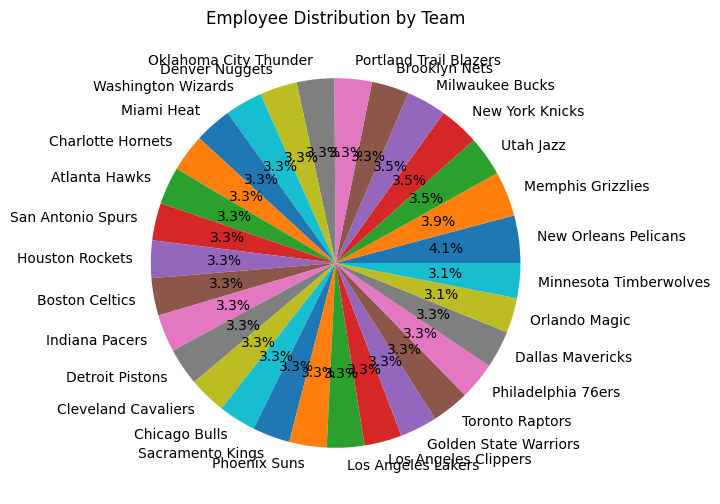

In [54]:

plt.figure(figsize=(6,6))
team_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Employee Distribution by Team")
plt.ylabel("")
plt.show()




 Task 2 - Distribution of emplyees by their position

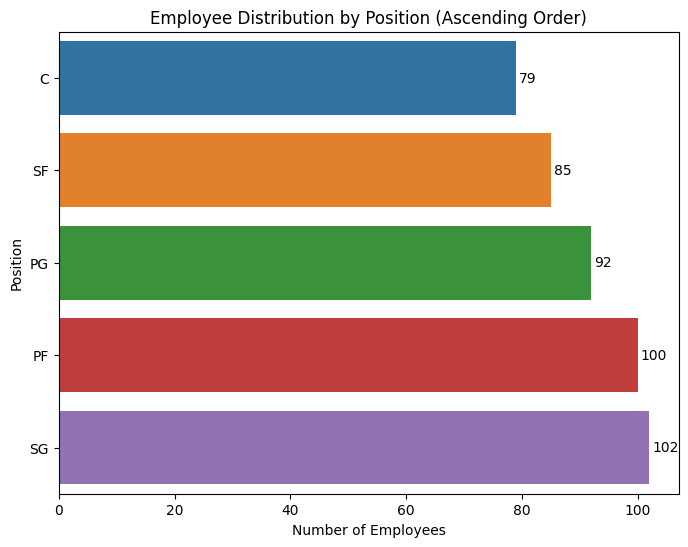

In [13]:

position_counts = df['Position'].value_counts()

# Sort in ascending order
position_counts = position_counts.sort_values(ascending=True)
# Plot horizontal bar chart
plt.figure(figsize=(8,6))
ax=sns.barplot(x=position_counts.values, y=position_counts.index, orient='h')
for i, v in enumerate(position_counts.values):
    ax.text(v + 0.5, i, str(v), color='black', va='center')



plt.title("Employee Distribution by Position (Ascending Order)")
plt.xlabel("Number of Employees")
plt.ylabel("Position")
plt.show()


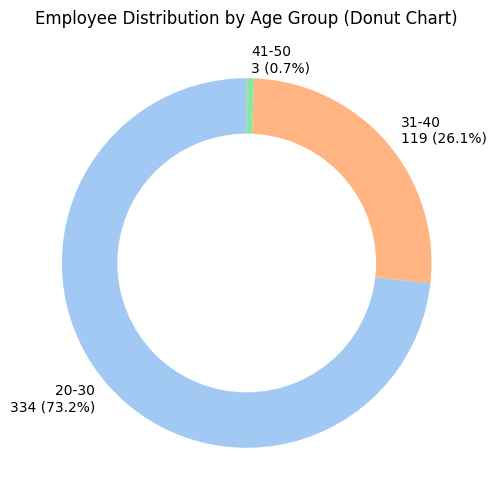

In [39]:

# Task 3: Predominant age group (3 categories + donut chart)

# Define 3 age groups
bins = [20, 30, 40, 50,]   # only up to 50
labels = ['20-30', '31-40', '41-50']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Count employees in each age group
age_group_counts = df['age_group'].value_counts().sort_index()
total = age_group_counts.sum()

# Build labels with counts + percentages
labels_with_values = [
    f"{label}\n{count} ({count/total:.1%})"
    for label, count in zip(age_group_counts.index, age_group_counts.values)
]

# Plot donut chart
plt.figure(figsize=(8,6))
wedges, texts = plt.pie(
    age_group_counts.values,
    labels=labels_with_values,
    colors=sns.color_palette("pastel", len(age_group_counts)),
    autopct=None,  # we already added percentages in labels
    startangle=90
)

# Add a white circle in the middle to make it a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Employee Distribution by Age Group (Donut Chart)")
plt.show()


Predominant age group: 20-30.


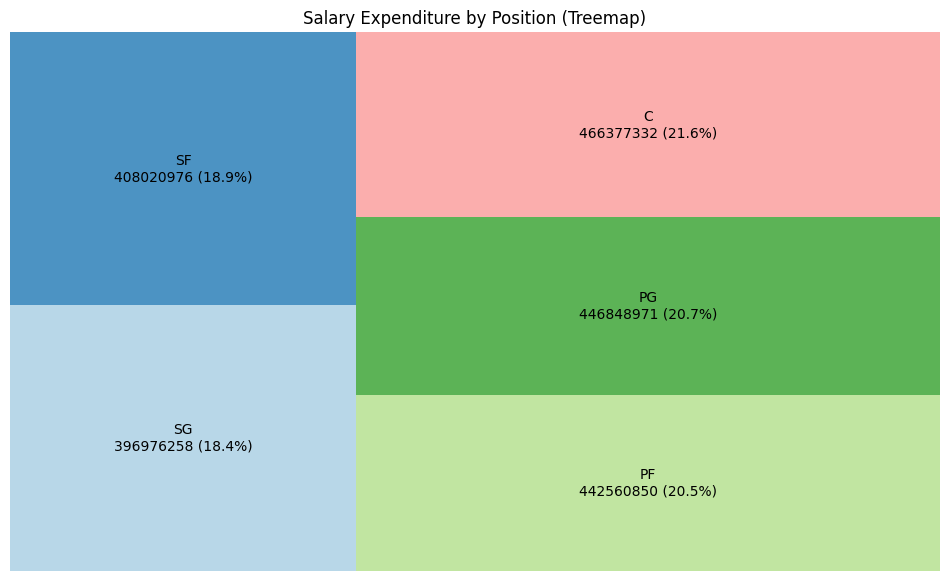

In [20]:

# Task 4 Visualization: Salary expenditure by position (Treemap)

# Calculate salary expenditure by position
position_salary = df.groupby('Position')['Salary'].sum().sort_values(ascending=True)
total_salary = position_salary.sum()

# Build labels with both expenditure and percentage
labels_with_values = [
    f"{pos}\n{exp:.0f} ({exp/total_salary:.1%})"
    for pos, exp in zip(position_salary.index, position_salary.values)
]

# Plot treemap
plt.figure(figsize=(12,7))
squarify.plot(
    sizes=position_salary.values,
    label=labels_with_values,
    alpha=0.8,
    color=sns.color_palette("Paired", len(position_salary))
)
plt.title("Salary Expenditure by Position (Treemap)")
plt.axis("off")
plt.show()


Position C consumes the largest salary budget.



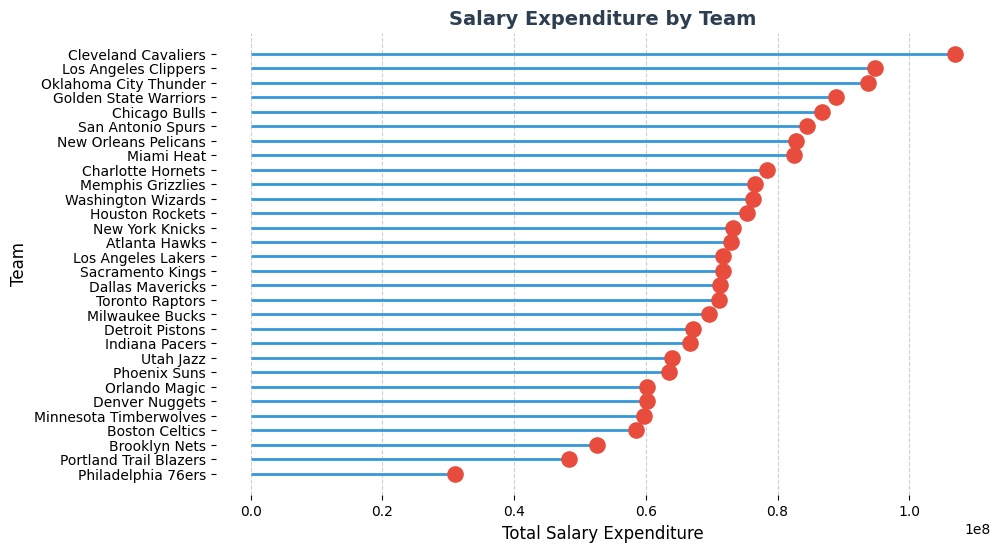

In [25]:
#Task 5 Visualization: Salary expenditure by team (Horizontal Lollipop Chart)
# Calculate salary expenditure by team
team_salary = df.groupby('Team')['Salary'].sum().sort_values(ascending=True)

# Plot horizontal lollipop chart
plt.figure(figsize=(10,6))
ax = plt.gca()

# Bright professional colors
line_color = "#3498db"   # bright blue
dot_color = "#e74c3c"    # bright red for contrast

# Draw horizontal lines (sticks)
ax.hlines(y=team_salary.index, xmin=0, xmax=team_salary.values, color=line_color, linewidth=2)

# Draw dots (lollipops)
ax.scatter(team_salary.values, team_salary.index, color=dot_color, s=120, zorder=3)

# Styling
plt.title("Salary Expenditure by Team", fontsize=14, fontweight='bold', color="#2C3E50")
plt.xlabel("Total Salary Expenditure", fontsize=12)
plt.ylabel("Team", fontsize=12)
sns.despine(left=True, bottom=True)  # clean look
plt.grid(axis='x', linestyle='--', alpha=0.6)  # subtle vertical gridlines
plt.show()

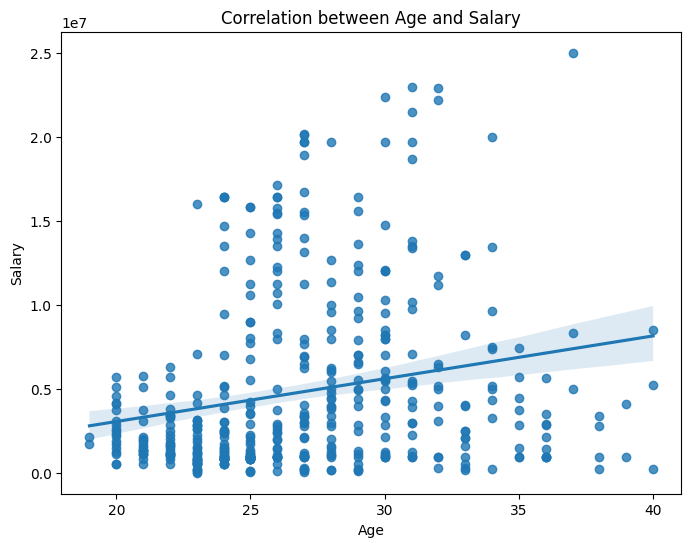

In [28]:

# Age vs Salary correlation
plt.figure(figsize=(8,6))
sns.regplot(x='Age', y='Salary', data=df)
plt.title("Correlation between Age and Salary")
plt.show()

# Insights -
- Team Cleveland Cavaliers has the highest salary expenditure.
- Position C consumes the largest salary budget.
- Predominant age group: 20-30.
- Team distribution shows workforce concentration in certain teams.
- Correlation between age and salary is 0.21, suggesting a positive relationship.